# Import important liberaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Load titanic dataset

In [5]:
df = pd.read_csv(r"C:\Users\yashk\Downloads\tested.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Features
    PassengerId : The id given to each traveller on the boat.
    Pclass : The Passenger class. It has three possible values: 1,2,3 (first, second and third class).
    Name : The Name of the passeger.
    Sex : The Gender of the Passenger.
    Age : The Age of the Passenger.
    SibSp : The number of siblings and spouses traveling with the passenger.
    Parch : number of parents and children traveling with the passenger.
    Ticket : The ticket number of the Passenger.
    Fare : The ticket Fare of the passenger
    Cabin : The cabin number.
    Embarked : This describe three areas of the Titanic from which the people embark. Three possible values 
    S,C,Q (Southampton, Cherbourg, Queenstown).
    Qualitative Features (Categorical) : PassengerId , Pclass , Survived , Sex , Ticket , Cabin , Embarked.
    Quantitative Features (Numerical) : SibSp , Parch , Age , Fare.

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling missing values

In [8]:
df = df.drop(columns ="Cabin",axis=1)

In [9]:
#replace the missing values in "Age" columns with mean values
df['Age'].fillna(df['Age'].mean() , inplace=True)

In [10]:
df["Fare"].fillna(df["Fare"].mean(),inplace=True)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data analysis and visualization

In [13]:
# Get some static measure about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
# find no of people survived or not survived
df["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [15]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

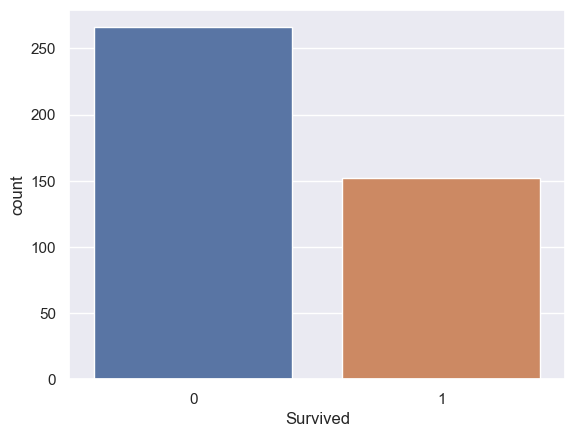

In [16]:
#COUNT FOR PEOPLE WHO SURVIVED OR NOT SURVIVED 
sns.countplot(x='Survived', data = df)

In [17]:
df["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

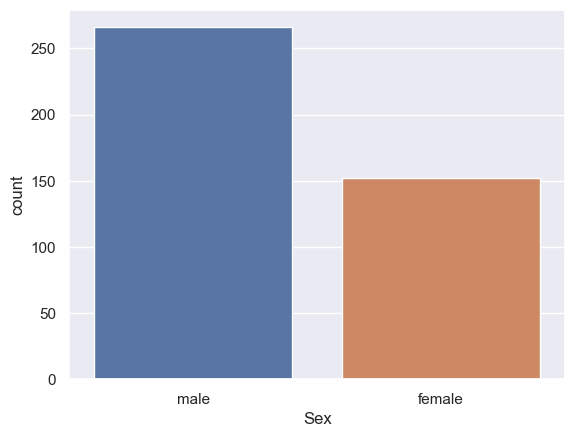

In [18]:
# COUNT FOR NO. OF MALE AND FEMALE
sns.countplot(x='Sex', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

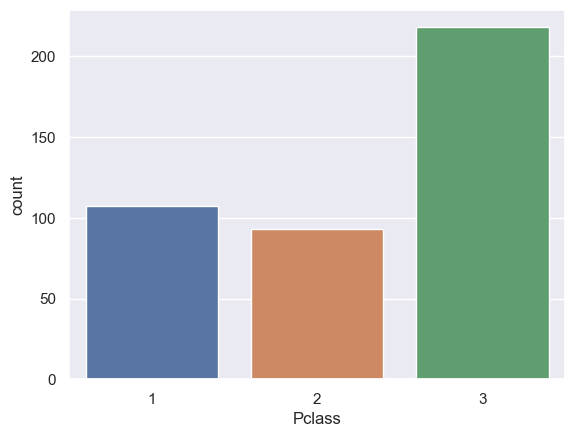

In [19]:
sns.countplot(x='Pclass', data = df)

<Axes: xlabel='Sex', ylabel='count'>

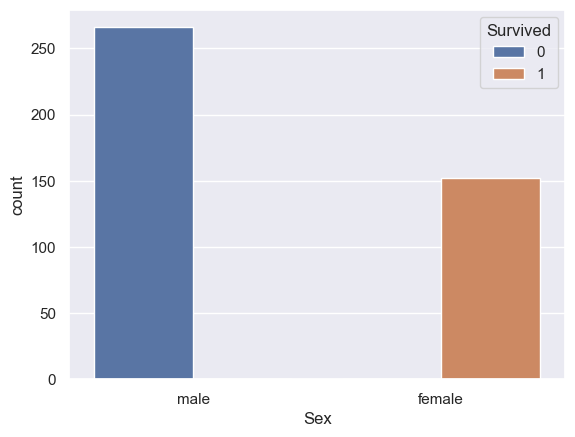

In [20]:
sns.countplot(x='Sex',hue="Survived", data = df)

In [ ]:
#SURVIVAL OF MALE GREATER THAN FEMALE

<Axes: xlabel='Pclass', ylabel='count'>

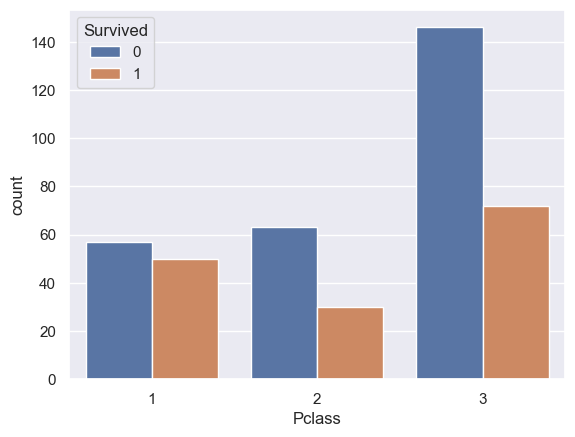

In [21]:
sns.countplot(x='Pclass',hue="Survived", data = df)

<Axes: xlabel='SibSp', ylabel='count'>

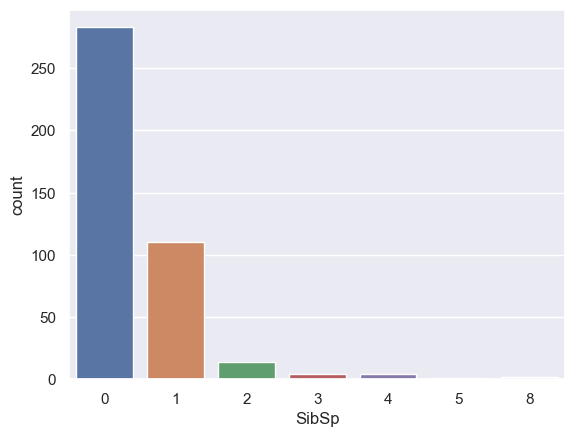

In [22]:
sns.countplot(x='SibSp', data = df)

<Axes: xlabel='SibSp', ylabel='count'>

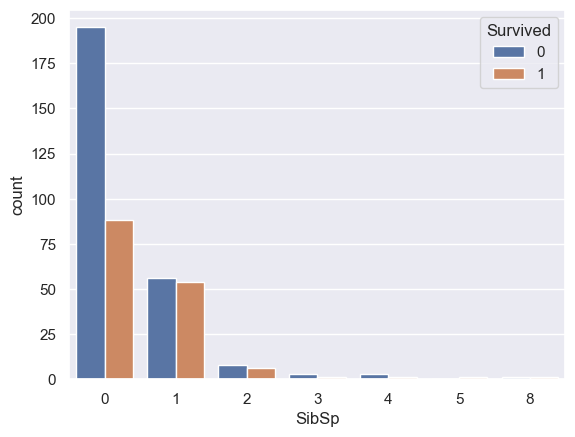

In [23]:
sns.countplot(x='SibSp',hue="Survived", data = df)

C:\Users\yashk\AppData\Local\Temp\ipykernel_11436\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

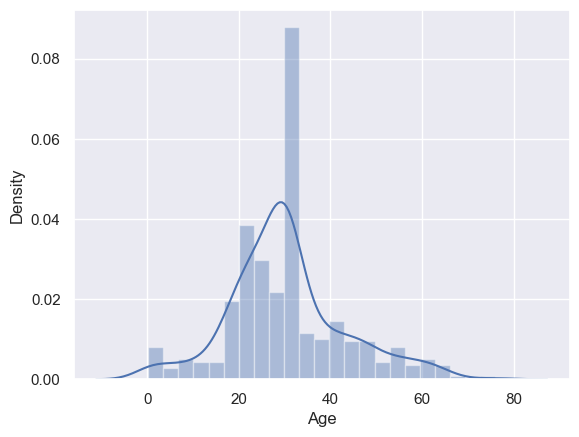

In [24]:
#PEOPLW WHO'S AGE BWTWEEN 20 TO 40 ARE MORE 
sns.distplot(df["Age"])

C:\Users\yashk\AppData\Local\Temp\ipykernel_11436\3282153852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


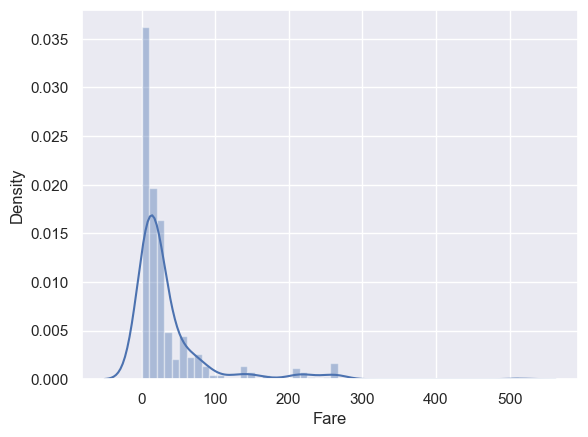

In [25]:
sns.distplot(df["Fare"])
plt.show()

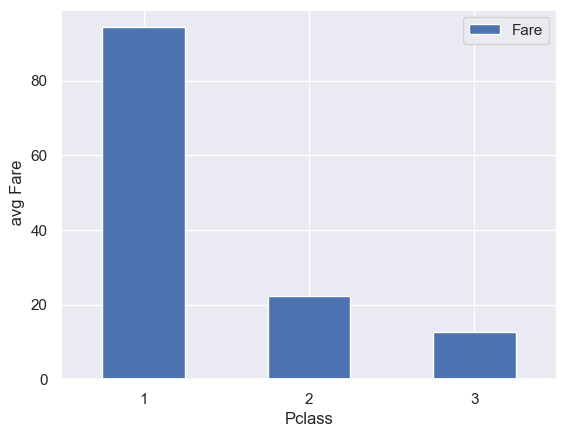

In [26]:
#PLOT B/W PCLASS AND AVG FARE
class_fare= df.pivot_table(index="Pclass",values ="Fare")
class_fare.plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel(" avg Fare")
plt.show()

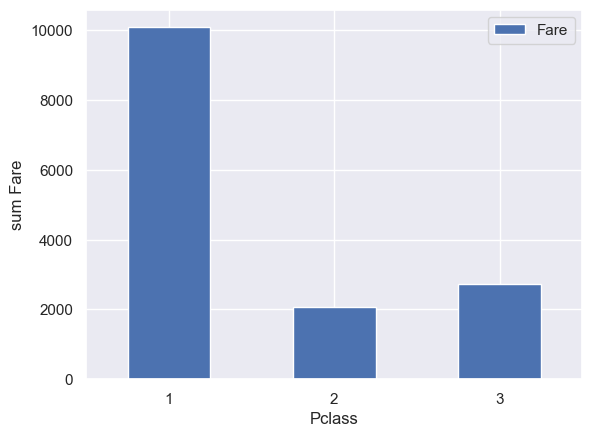

In [27]:
#PLOT B/W PCLASS AND SUM FARE
class_fare= df.pivot_table(index="Pclass",values ="Fare",aggfunc = np.sum)
class_fare.plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("sum Fare")
plt.show()

Encoding the caterogies columns

In [28]:
df["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [29]:
df["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [2]:
#ENCODING FOR SEX COLUMN "0 FOR MALE" , "1 FOR FEMALE"
#ENCODING FOR EMBARKED COLUMN "0 FOR S","1 FOR C" , "2 FOR Q"

In [30]:
df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [9]:
x = df.drop(columns= ["PassengerId","Name","Ticket","Survived"],axis=1)

In [12]:
y = df["Survived"]

In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [35]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

# Train And Test Model

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=2)


In [37]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
109,2,0,18.50000,0,0,13.0000,0
231,1,1,21.00000,0,0,26.5500,0
321,3,0,25.00000,0,0,7.2292,1
398,3,0,22.00000,0,0,7.7750,0
13,2,0,63.00000,1,0,26.0000,0
...,...,...,...,...,...,...,...
299,3,0,29.00000,0,0,7.8542,0
22,1,1,30.27259,0,0,31.6833,0
72,3,1,29.00000,0,0,7.9250,0
15,2,1,24.00000,1,0,27.7208,1


In [38]:
y_train

109    0
231    1
321    0
398    0
13     0
      ..
299    0
22     1
72     1
15     1
168    1
Name: Survived, Length: 292, dtype: int64

In [14]:
print(x_train.shape,x_test.shape)

(292, 8) (126, 8)


# Model Prediction

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train,y_train)

C:\Users\yashk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [44]:
print("Accuracy",model.score(x_test,y_test))

Accuracy 1.0


In [45]:
from sklearn import tree

In [46]:
models = tree.DecisionTreeClassifier()
models.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
models.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [48]:
print("Accuracy",model.score(x_test,y_test))

Accuracy 1.0


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [51]:
model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [52]:
print("Accuracy",model.score(x_test,y_test))

Accuracy 1.0


We investigated the data, checking for data unbalancing, visualizing the features and understanding
the relationship between different features. We then investigated two predictive models. 
The data was split in 2 parts, a train set and a test set. For the  models,
we only used the train and test set.

We started with LogisticRegression, for which we obtained an AUC scode of 1.00 when predicting the target for the test set.
We started with tree.DecisionTreeClassifier, for which we obtained an AUC scode of 1.00 when predicting the target for the test set.
We started with RandomForrestClassifier, for which we obtained an AUC scode of 1.00 when predicting the target for the test set.
